# 1. Информация по задаче

## 1.1 Цель

Предсказание качества вина

## 1.2 Описание

Два набора данных относятся к красному и белому вариантам португальского вина «Vinho Verde». Ссылка [Cortez et al., 2009]. Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и органолептические (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для определения нескольких отличных или плохих вин. Кроме того, мы не уверены, что все входные переменные релевантны. Так что было бы интересно протестировать методы выбора признаков.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

Информация об атрибутах:

Для получения дополнительной информации см. [Cortez et al., 2009].
Входные параметры (на основе физико-химических тестов):

1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - остаточный сахар

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - рН

10 - сульфаты

11 - спирт

Выходная переменная (на основе сенсорных данных):

12 - качество (оценка от 0 до 10)

[Информация из Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)

# 2. Data understanding

## 2.1 Загрузка библиотек

In [201]:
# работа и анализ данных
import numpy as np
import pandas as pd

# визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

# балансировка классов
from imblearn.over_sampling import SMOTE

# обучение моделей
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# игнорирование ошибок
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## 2.2 Вспомогательные функции

In [170]:
# подключеник к гугл диску для загрузки данных

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [203]:
# функция для обучения модели и получения скора

def pred_model(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    # обучаем модель
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

## 2.3 Загрузка данных

In [204]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Нетология/Менеджмент дата-проектов/winequalityN.csv')

## 2.4 Статистика и визуализация

### 2.4.1 Статистика и оценка данных

In [205]:
# посмотрим на данные

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [206]:
# оценим данные

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Видно, что у нас есть категориальная перемення (тип вина), много числовых переменных с плавающей точкой и целые значения по качетсву вина. 

Так же видно наличие пропусков в некоторых категориях. 

In [207]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [208]:
# посмотрим на основные характеристики

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Для удобства еще раз продублируем обозначения заголовков:

1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - остаточный сахар

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - рН

10 - сульфаты

11 - спирт

In [209]:
# выведем количество уникальных значений из каждой категории

for label in df.columns:
  print(label + ': ', len(df[label].unique()))

type:  2
fixed acidity:  107
volatile acidity:  188
citric acid:  90
residual sugar:  317
chlorides:  215
free sulfur dioxide:  135
total sulfur dioxide:  276
density:  998
pH:  109
sulphates:  112
alcohol:  111
quality:  7


Выводы: нужно заполнить имеющиеся пропуски. Для упрощения воспользуемся простым заполнением средним значением. 

### 2.4.2 Визуализация данных

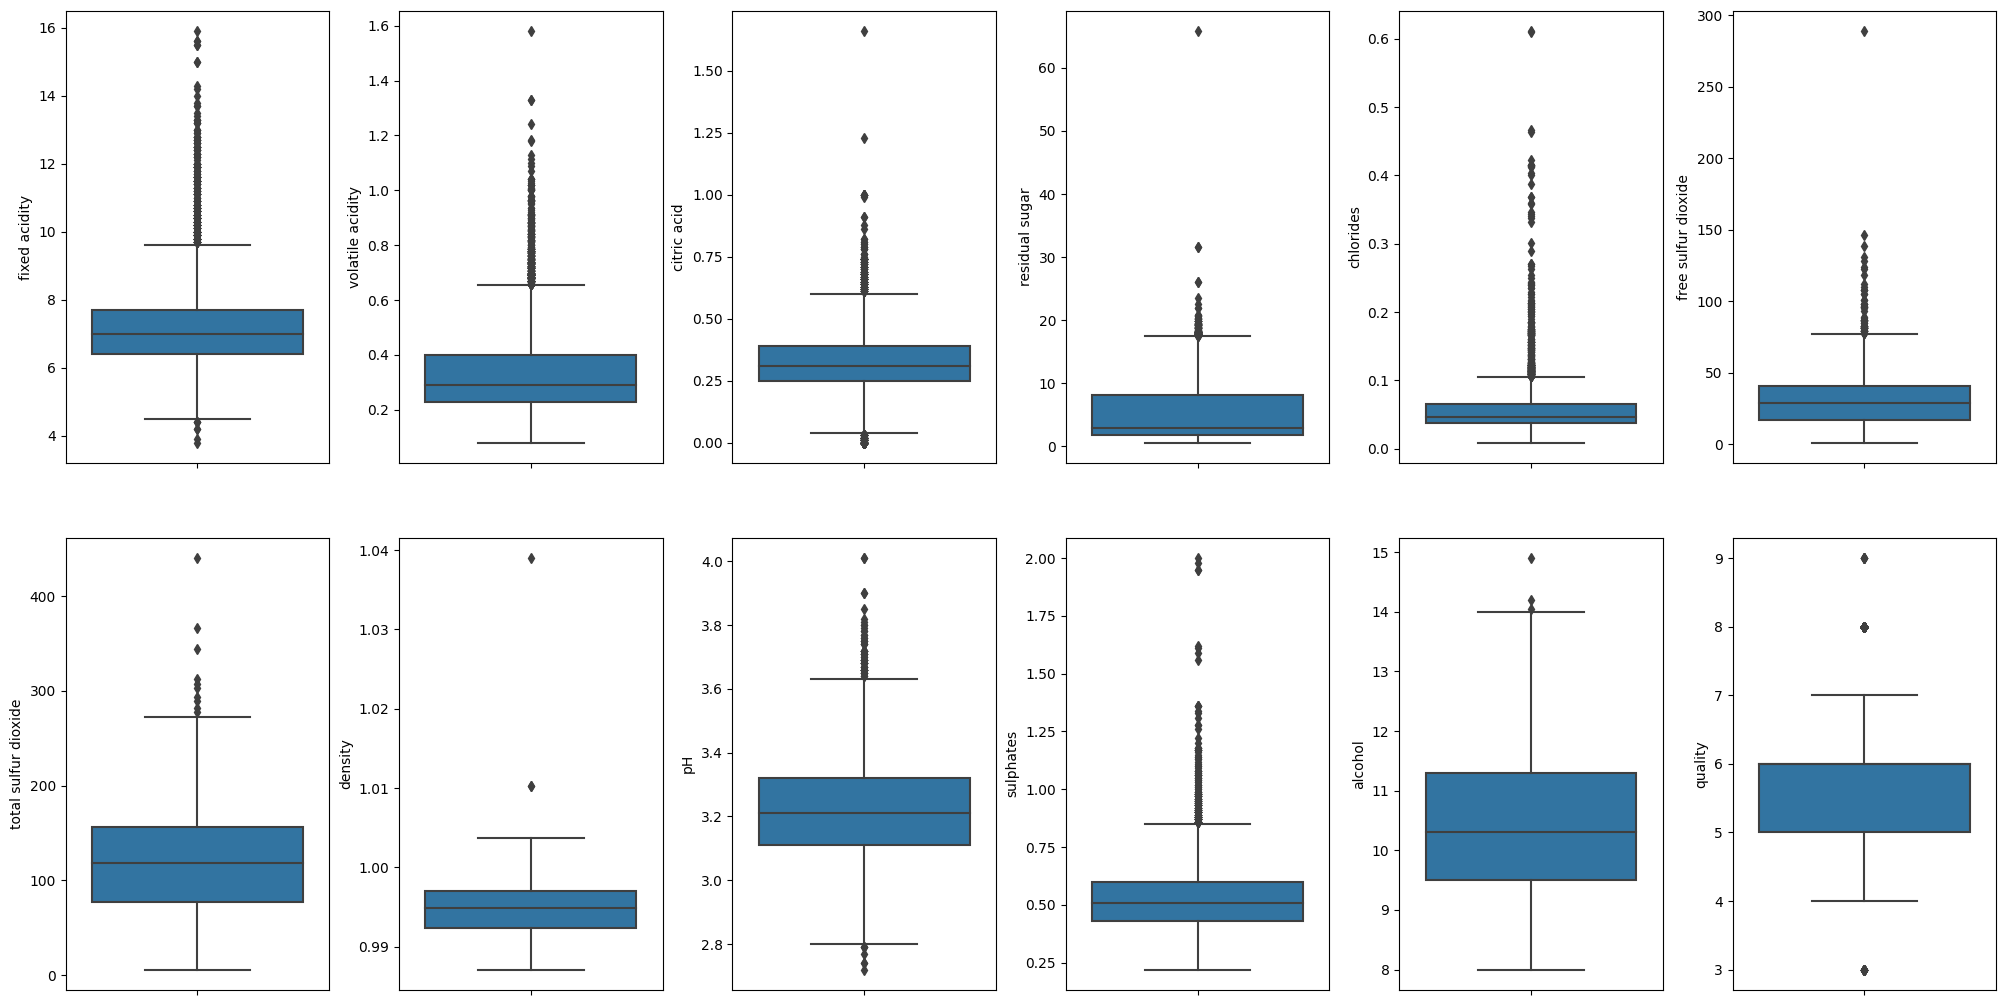

In [210]:
# оценим выбросы по каждому параметру

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

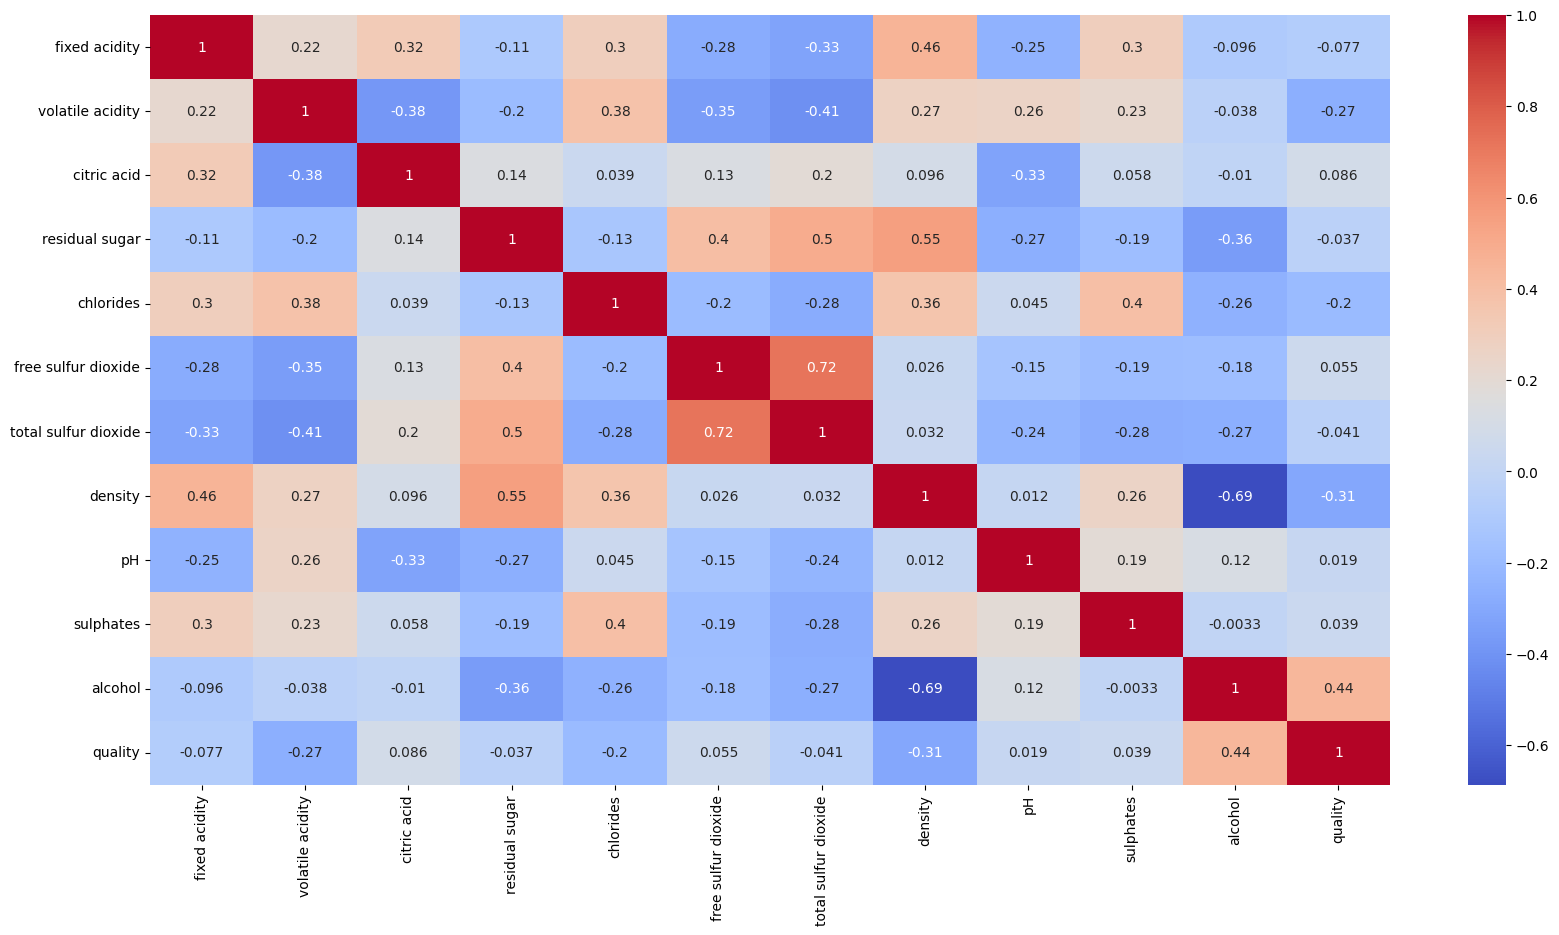

In [211]:
# построим матрицу корреляции между признаками

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


<Axes: xlabel='quality', ylabel='count'>

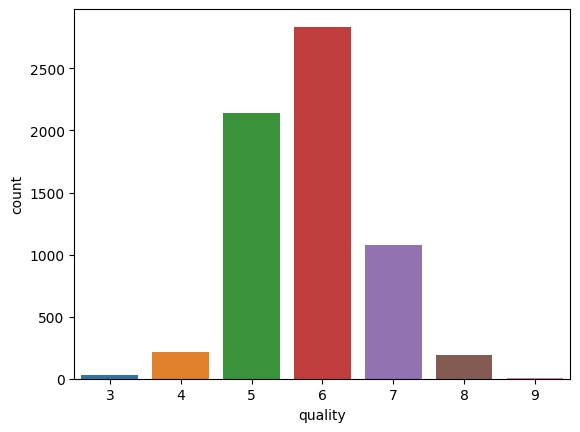

In [213]:
# посмотрим на баланс классов по качеству вина

sns.countplot(x=df['quality'])

Вывод: 

1) В некоторых категориях есть сильные выбросы. Попробуем удалить их. 

2) Так же видно, что есть сильная корреляция между free sulfur dioxide и total sulfur dioxide. Удалим free sulfur dioxide. 

Еще видно положительную связь между quality и alcohol. А alcohol имеет отрицательную корреляцию с density. Удалим density для уменьшения признакового пространства. 

3) Видно, что оценки качества вина (целевые метки) находятся на отрезке от 3 до 9 и очень не сбалансированы. 

# 3. Data preparation

## 3.1 Заполним пропуски в данных

In [214]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [215]:
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [216]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3.2 Удаление некоторых категорий и выбросов

In [217]:
# удалим категории с сильной корреляцией с другими признаками

df = df.drop(columns=['free sulfur dioxide', 'density'])
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6


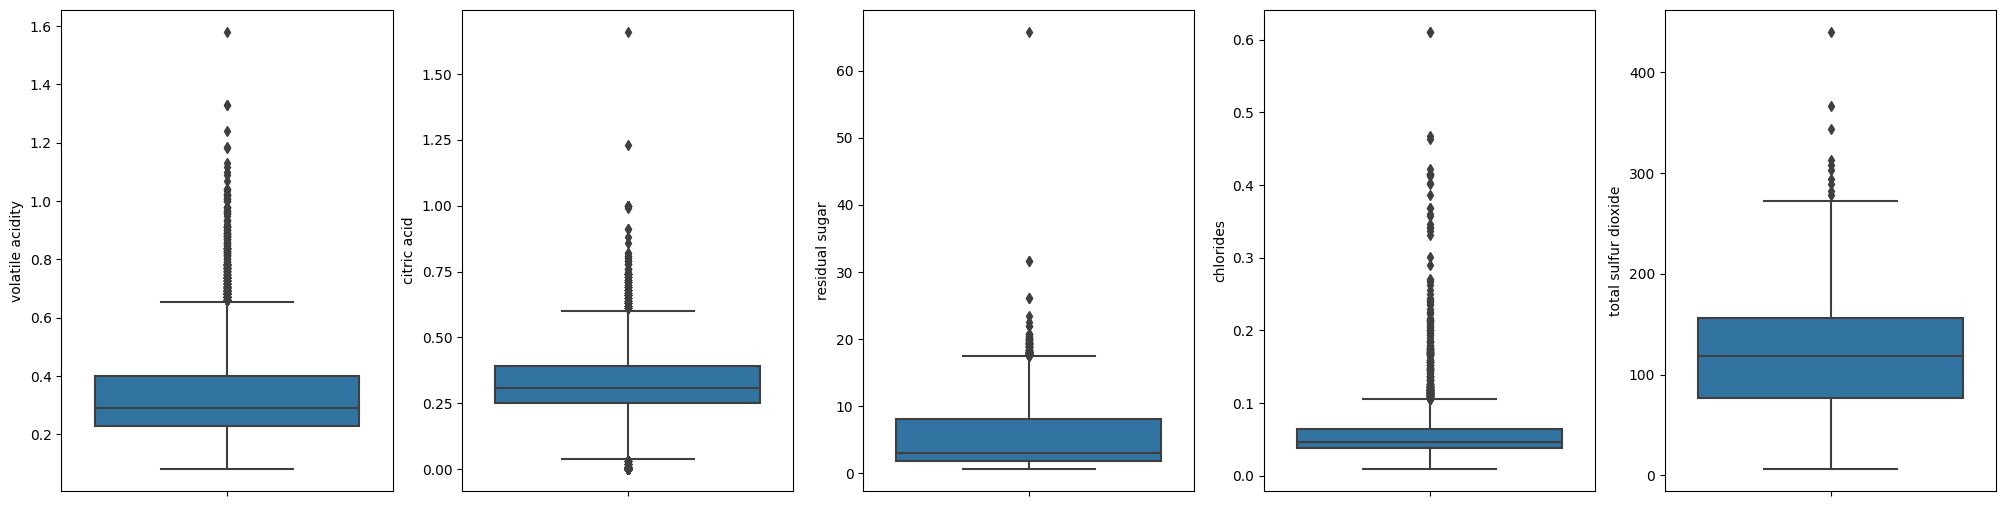

In [218]:
# возьмем только volatile acidity, citric acid, residual sugar, chlorides, total sulfur dioxide, т.к. есть подозрения, что там выбросы

# для наглядности, еще раз оценим выбросы по каждому параметру

fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col in ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide']:
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

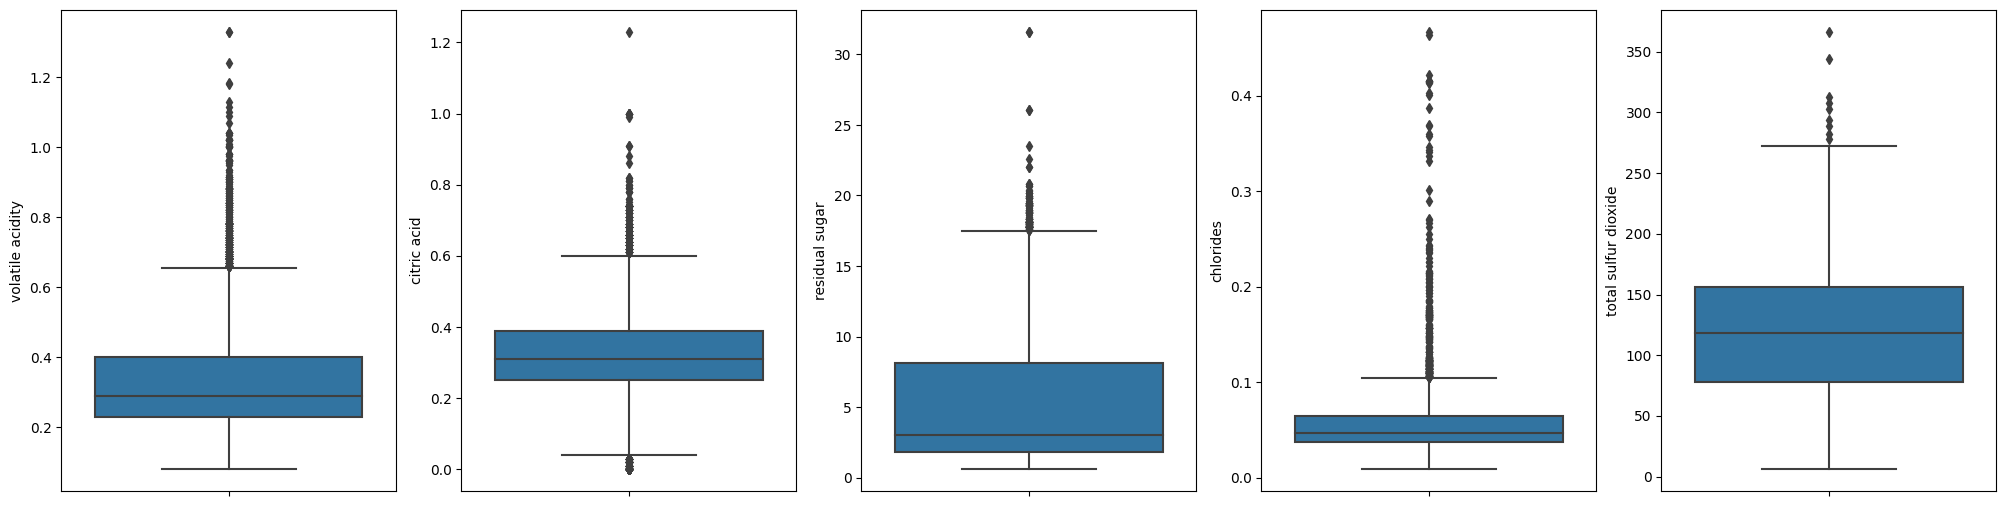

In [219]:
df = df[df['volatile acidity'] < 1.4]
df = df[df['citric acid'] < 1.5]
df = df[df['residual sugar'] < 50]
df = df[df['chlorides'] < 0.5]
df = df[df['total sulfur dioxide'] < 400]

fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col in ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide']:
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## 3.3 Балансировка классов

In [220]:
# переведем категориальный признак type в число

df['type'] = pd.get_dummies(df['type'], drop_first=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6


In [221]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [222]:
# для удобства, сразу разделим наши данные на признаки и цели

X = df[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']]
y = df['quality']

In [223]:
# еще раз посмотрим на дисбаланс целевой переменной

y.value_counts() 

6    2834
5    2137
7    1079
4     215
8     193
3      28
9       5
Name: quality, dtype: int64

In [224]:
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

In [225]:
y.value_counts() 

6    2834
5    2834
7    2834
8    2834
4    2834
3    2834
9    2834
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

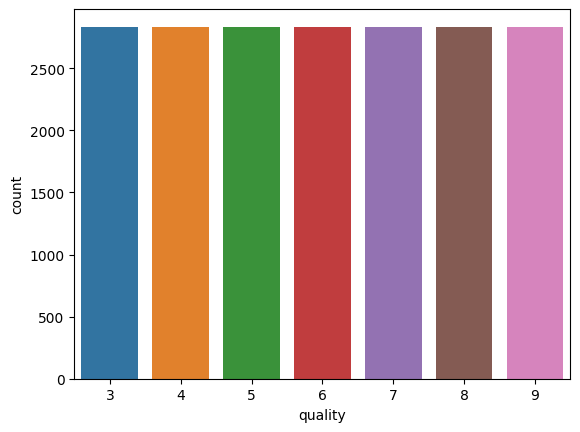

In [226]:
# посмотрим на новый баланс классов по качеству вина

sns.countplot(x=y)

# 4. Моделирование

## 4.1 Выбор модели для обучения

Будем тестировать следующие модели для обучения:
- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier
- ExtraTreesClassifier

## 4.2 Обучение моделей

In [227]:
model = LogisticRegression()
pred_model(model, X, y)

Accuracy: 33.568548387096776
CV Score: 31.898077231921413


In [228]:
model = DecisionTreeClassifier()
pred_model(model, X, y)

Accuracy: 80.94758064516128
CV Score: 74.67993506915927


In [229]:
model = RandomForestClassifier()
pred_model(model, X, y)

Accuracy: 87.24798387096774
CV Score: 82.0697544052953


In [230]:
model = ExtraTreesClassifier()
pred_model(model, X, y)

Accuracy: 88.86088709677419
CV Score: 83.15350761727804


# 5. Оценка

In [231]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print("Accuracy:", model.score(x_test, y_test) * 100)

score = cross_val_score(model, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

Accuracy: 88.91129032258065
CV Score: 83.23419089545199


Лучший результат был получен при обучении модели ExtraTreesClassifier. 

Полученный скор:

Accuracy: 88.91129032258065

CV Score: 83.23419089545199

# 6. Развертывание

In [232]:
pred = model.predict(x_test)
solution = pd.DataFrame({'quality': pred})
solution.head()

,quality
0,9
1,9
2,7
3,6
4,3


In [200]:
solution.to_csv('Pred_Wine_Quality.csv', index=False)